## MSBA 326 Final Project Instacart dataset_Crow

### Y variable is "user_id" (Users feature) & Order Products Prior

In [1]:
from pandas import read_csv
import pandas as pd

# Read in the Orders "train" only of Instacart dataset
# Data subsetting done/created by Evan

orders_train = pd.read_csv("~/Desktop/train.csv")
orders_train

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,6,22352,prior,4,1,12,30
1,8,3107,prior,5,4,6,17
2,14,18194,prior,49,3,15,3
3,19,83009,prior,7,5,17,13
4,21,88772,prior,13,2,12,5
...,...,...,...,...,...,...,...
1048570,3421060,28462,prior,8,0,17,26
1048571,3421064,76586,prior,38,5,15,9
1048572,3421067,31369,prior,5,3,15,28
1048573,3421072,50050,prior,3,3,19,26


#### Using Order Products Prior dataset

In [2]:
# Read in the Order_Products_Prior dataset

order_products_train = pd.read_csv("~/Desktop/order_products_prior.csv")
order_products_train

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


### Merge "Orders train" with "Orders_Product_Prior" csv

In [5]:
# Merge "Orders train" with "Orders_Product_Prior" csv
# We want columns in the Right dataset to match with
# the left. order_products_Prior is Left, orders_train is Right
# When they merge, the "train" eval_set drops off, so the dataset is smaller???
# Removed "eval_set" column since it was creating errors (categorical not needed).

new_data_train = pd.merge(order_products_train, orders_train, on='order_id', how="left")
new_data_train = new_data_train.dropna()
del new_data_train['eval_set']
new_data_train

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
56,6,40462,1,0,22352.0,4.0,1.0,12.0,30.0
57,6,15873,2,0,22352.0,4.0,1.0,12.0,30.0
58,6,41897,3,0,22352.0,4.0,1.0,12.0,30.0
61,8,23423,1,1,3107.0,5.0,4.0,6.0,17.0
125,14,20392,1,1,18194.0,49.0,3.0,15.0,3.0
...,...,...,...,...,...,...,...,...,...
32434460,3421080,31717,5,0,52726.0,2.0,1.0,11.0,2.0
32434461,3421080,12935,6,1,52726.0,2.0,1.0,11.0,2.0
32434462,3421080,25122,7,0,52726.0,2.0,1.0,11.0,2.0
32434463,3421080,10667,8,0,52726.0,2.0,1.0,11.0,2.0


### Y variable is "user_id" (Users feature)

In [6]:
from sklearn.model_selection import train_test_split

# Creating a new variable so that we don't have to keep
# re-running the above kernel. We only run whatever
# amount is in .head() parenthesis
# Use small amount for test. 502,357 is too large,
# too long to run & crashes. OK run time from 1,000
# to 3,000 rows. Smaller amount generates a better
# accuracy score for Support Vector Classifier
# Y variable is "user_id"

limited_new_data_train = new_data_train.head(1000)

# Preparing the data, one way
X = limited_new_data_train.drop('user_id', axis=1)  
y = limited_new_data_train['user_id']  
colTags = list(X.columns.values)

# Split into training and test sets. 70% train, 30% test model
# Tried 100/0, get an error. Tried 95/5, runs slow & gets
# 0.01 to 0.03 output. So not good.
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.3, random_state=0)
X

,order_id,product_id,add_to_cart_order,reordered,order_number,order_dow,order_hour_of_day,days_since_prior_order
56,6,40462,1,0,4.0,1.0,12.0,30.0
57,6,15873,2,0,4.0,1.0,12.0,30.0
58,6,41897,3,0,4.0,1.0,12.0,30.0
61,8,23423,1,1,5.0,4.0,6.0,17.0
125,14,20392,1,1,49.0,3.0,15.0,3.0
...,...,...,...,...,...,...,...,...
2801,302,30391,10,1,12.0,5.0,12.0,8.0
2802,302,22034,11,0,12.0,5.0,12.0,8.0
2803,302,4086,12,0,12.0,5.0,12.0,8.0
2804,302,260,13,0,12.0,5.0,12.0,8.0


### Perform multi-label classification using SVC (use one vs. others since SVC is a binary classification)

In [7]:
from sklearn.datasets import make_multilabel_classification
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Prepare the multilabel model/classifier "One vs. Rest"
# Use radial basis function "rbf" kernel. It can map an
# input space in infinite dimensional space.
# Support Vector Classifier

model = OneVsRestClassifier(SVC(kernel='rbf', degree=2, C=1.0))
model.fit(X_train, y_train)

acct_score = accuracy_score(y_test, model.predict(X_test))

print('The accuracy score of multi-label classification with SVC is {}.'.format(round(acct_score, 2)))

The accuracy score of multi-label classification with SVC is 0.02.


### PCA on X values (input features only) first, then use oneVsRestClassifier() with PCA

In [8]:
from sklearn.preprocessing import StandardScaler

# Standardize to unit variance so that the range of all the
# features are normalized, allowing each feature to contribute
# approx proportionately to the final distance.

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [9]:
import numpy as np

# Using the numpy.cov function, we computed the covariance matrix
# of the standardized training data set.
# Using the linalg.eig function, we performed the eigendecomposition,
# which yielded a vector (eigen_vals) consisting of 13 eigenvalues and
# corresponding eigenvectors as columns in a 13 x 13 dimensional matrix.

cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vect = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[0.5121144  1.437851   0.83821616 1.16605407 1.10320079 0.93542029
 1.02420613 0.99438207]


In [10]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [11]:
# Feature transformation

# Sort the eigenpairs by descending order of the eigenvalues,
# construct a projection matrix from the selected eigenvectors,
# and use the projection matrix to tranform the data onto the
# lower-dimensional subspace.
# Start by sorting the eigenpairs by decreasing order of the eigenvalues
# Create a 13x2 dimensional projection matrix W from the top two eigenvectors.


eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vect[:, i])
              for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [12]:
# Creating a projection matrix

w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
              eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[ 0.04200322 -0.23995599]
 [ 0.06455102 -0.42914903]
 [ 0.11349808 -0.59817124]
 [-0.54741915  0.26133788]
 [-0.68028822 -0.07213484]
 [-0.13829805 -0.31507227]
 [-0.24493045  0.08025574]
 [ 0.37364423  0.47035195]]


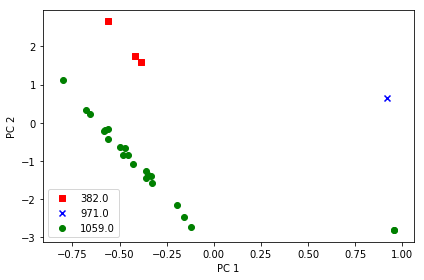

In [14]:
import matplotlib.pyplot as plt

# Using the projection matrix, we can now transform a sample x
# (represented as a 1x13 dimensional row vector) onto the PCA subspace,
# the Principal Components 1 and 2.
# We can also we can transform the entire 124 x 13 dimensional training
# data set onto the two principal components by calculating the dot product

X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0],
               X_train_pca[y_train == l, 1],
               c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [15]:
from sklearn.decomposition import PCA

# Apply PCA. Use training & testing from Standardize
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [16]:
# It indicates the proportion of the dataset's variance that lies
# along the axis of each principal component
print(pca.explained_variance_ratio_)

[0.17947462 0.14554853]


In [17]:
# Changed n_components to 3, seeing if there is a change
# PC1 to PC3 add up to .XX
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

print(pca.explained_variance_ratio_)

[0.17947462 0.14554853 0.1377031 ]


In [18]:
# Changed n_components to 7, to add up the ratios
# PC1 to PC7 add up to .XX
# 17.9% of the dataset's variance lies along the first axis,
# 14.5% of the dataset's variance lies along the second axis
# The further down we go with the PC, the less information is
# carried on the axes
pca = PCA(n_components=7)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

print(pca.explained_variance_ratio_)

[0.17947462 0.14554853 0.1377031  0.12784287 0.12412019 0.1167605
 0.10462734]


In [19]:
# Book: Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow
# by Aurelien Geron 2nd Edition
# pg 225

# You can set n_components to be a float between 0.0 and 1.0,
# indicating the ratio of variance we wish to preserve

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
print(pca.explained_variance_ratio_)

[0.99996395]


In [20]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Prepare the multilabel classifier "One vs. Rest" with PCA
model_pca = OneVsRestClassifier(SVC(kernel='rbf', degree=2, C=1.0))
model_pca.fit(X_train_pca, y_train)

acct_score2 = accuracy_score(y_test, model_pca.predict(X_test_pca))

print('The accuracy score of multi-label classification with PCA {}.'.format(round(acct_score2, 2)))

The accuracy score of multi-label classification with PCA 0.75.


### Classifiers using kfold cross validation: Standard Decision Tree, Random Forest & Adaboost

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter("ignore")

# Prepare the models:
# Standard Decision Tree Classifier,
# Random Forest with a depth of 2
# Adaboost Classifier on Standared Decision Tree Classifier
# First Adaptive Boosting aka Adaboost
# Compare them using kfold cross validation with k=10 aka "n_splits=10"

models = []
models.append(('CART', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier(max_depth=2, random_state=0)))
models.append(('Adaboost', AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                                              n_estimators=200,
                                              algorithm="SAMME.R",
                                              learning_rate=0.5,
                                              random_state=42)))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

CART: 0.121000 (0.047000)
Random Forest: 0.033000 (0.057280)
Adaboost: 0.112000 (0.070399)


### Comparing algorithms by box plots

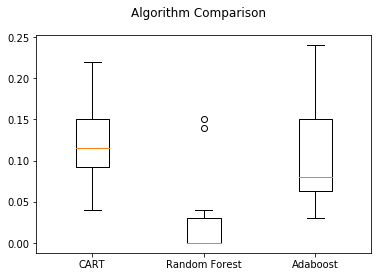

In [22]:
from matplotlib import pyplot

# Comparing algorithms by box plots

fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### Predictions with Decision Tree Classifier (F1-score)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

# Implement the Standard Decision Tree Classifier
# Do a fit method to train the system
from sklearn.tree import DecisionTreeClassifier  
dtreeC = DecisionTreeClassifier()  
dtreeC.fit(X_train, y_train)

# Make predictions using the test set
y_pred = dtreeC.predict(X_test)

# Run the classification report
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 7 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 4]]
              precision    recall  f1-score   support

       382.0       1.00      1.00      1.00         1
       971.0       0.00      0.00      0.00         1
      1059.0       1.00      1.00      1.00         7
      3321.0       1.00      1.00      1.00         4
      4076.0       0.75      1.00      0.86         3
      4209.0       1.00      1.00      1.00         2
      4645.0       1.00      1.00      1.00         1
      4988.0       1.00      1.00      1.00         5
      5189.0       1.00      1.00      1.00         1
      8456.0       1.00      1.00      1.00         1
      8841.0       1.00      1.00      1.00         2
     14264.0       1.00      1.00      1.00         9
     15608.0       1.00      1.00      1.00         5
     16288.0       1.00      1.00      1.00         4
     16694.0       1.00      1.00      1.00         2
     17547.0   